# Configuracion y conexion al servidor

## ¡No modificar la siguiente celda de codigo!

La siguiente celda es la que se encarga de conectar el notebook con la base de datos del curso de forma que se puedan hacer consultas de SQL en celdas de Python. Si se modifica, probablemente no funcionen los ejemplos y ejercicios de este notebook.

In [ ]:
%load_ext sql
connection_string = f#Escriba aca el String compartido por U-Cursos
%sql $connection_string

---

# Esquema Relacional

El esquema relacional de este laboratorio es el mismo que se usa en la clase llamado SistemaSolar. Este consiste de 3 tablas: Planeta, Aterrizaje y satelite.

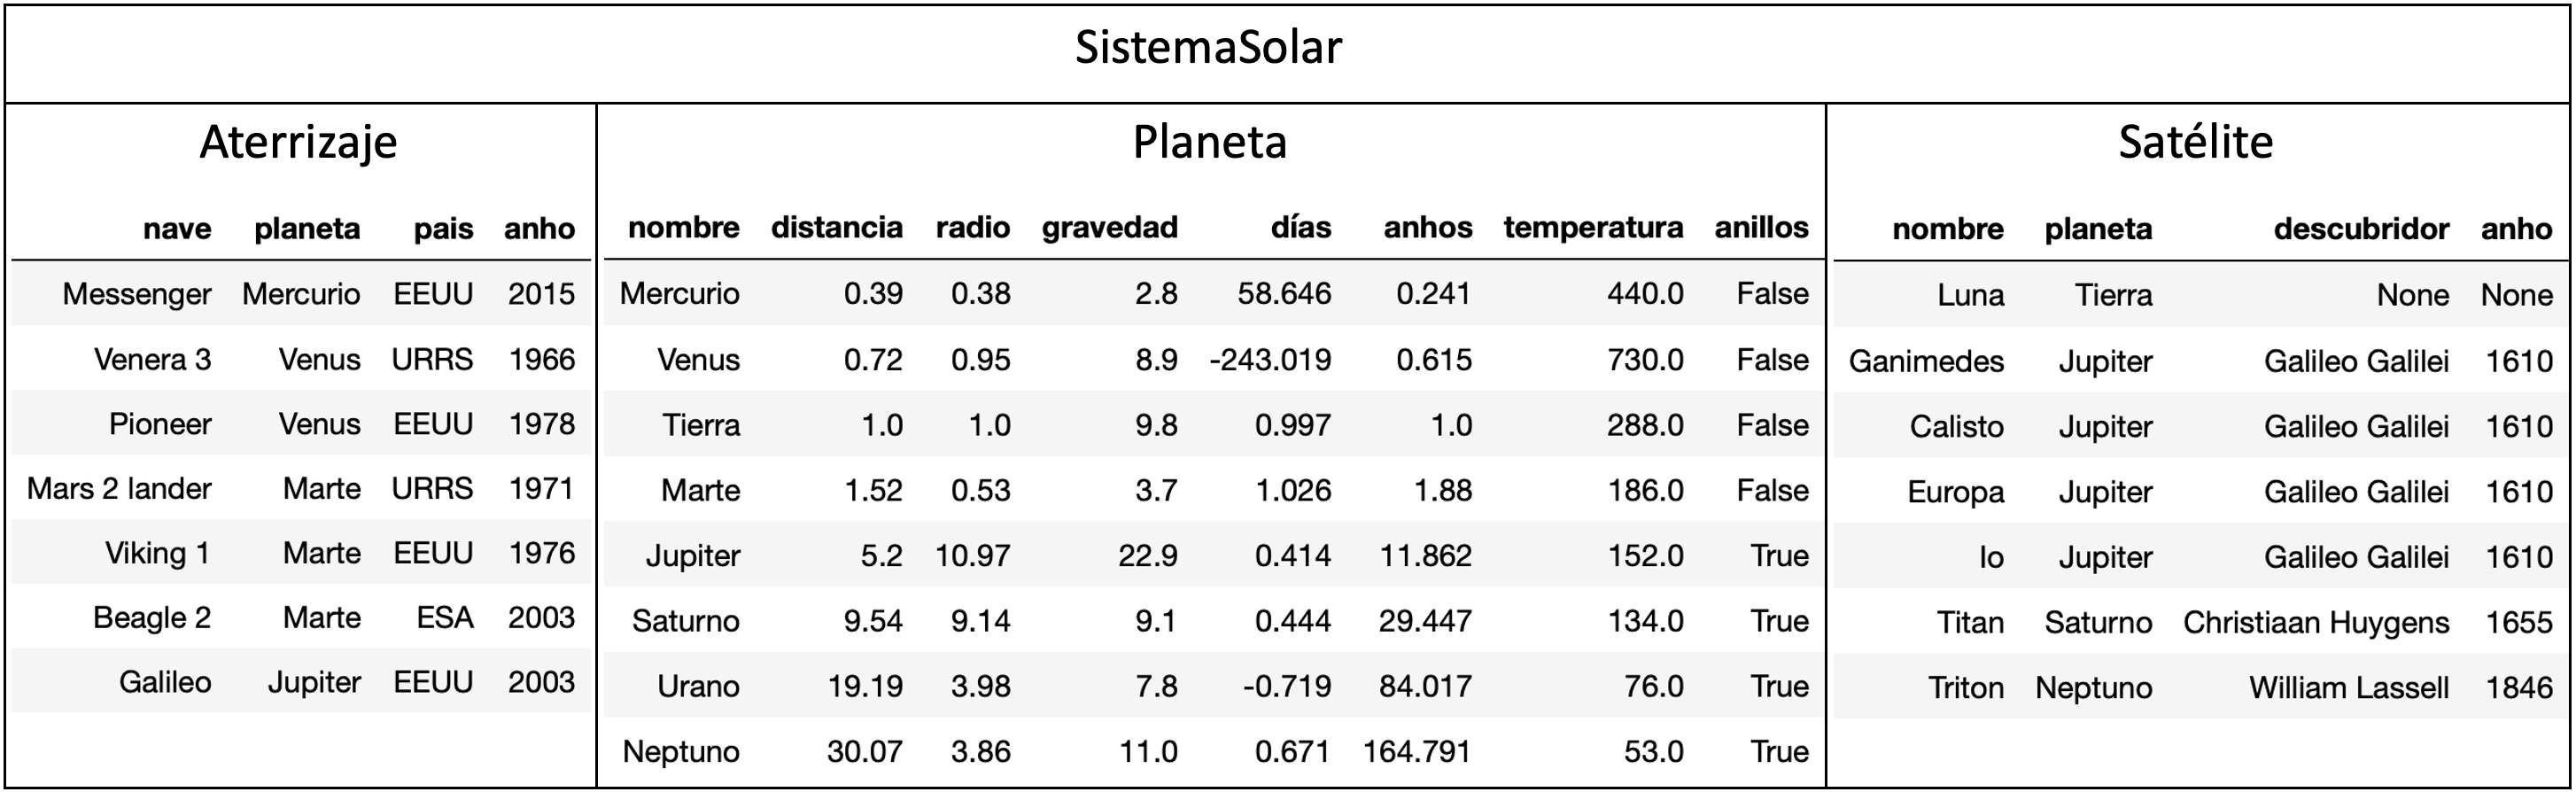

*Nota: en los esquemas relacionales se usará "nh" como sustituto de la ñ, esto debido a que pueden surgir problemas en algunos terminales que no acepten el caracter de la ñ.*

## Planeta

La primera tabla, llamada Planeta, contiene los planetas del sistema solar y algunos datos descritos a continuacion:

* nombre: nombre del planeta.

* distancia: resultado de la division de la distancia del planeta al sol dividido entre la distancia de la tierra al sol. Ejemplo: $\frac{DistanciaDeMercurioAlSol}{DistanciaDeLaTierraAlSol}=0,39$).

* radio: resultado de la division del radio del planeta entre el radio de la tierra
* gravedad: aceleración de la gravedad en $\frac{m}{s^2}$.

* dias: Tiempo que tarda en dar una rotación completa sobre su propio eje dividido entre 24 horas (los negativos es porque rota en sentido contrario a la tierra).
* anhos: duración del año en ese planeta dividido entre la duración de un año terrestre
* temperatura: Temperatura promedio del planeta en Kelvin.
* anillo: tiene o no anillos.

## Satelite

La segunda tabla, llamada Satelite, contiene informacion de algunos satelites (naturales) de los planetas del sistema solar:

Descripción de la tabla Satélite:
* nombre: nombre del satelite.
* planeta: nombre del planeta que órbita.
* descubridor: nombre de quien la descubrió.
* anho: año en que lo descubrieron.

## Aterrizaje

La ultima tabla, llamada Aterrizaje, contiene informacion de algunas misiones que han aterrizado en planetas del sistema solar:

* nave: nombre de la nave.
* planeta: planeta en donde aterrizo.
* pais: pais que financio el proyecto.
* anho: año del aterrizaje.

# Structured Query Language (SQL): Parte I

## ¿Que es SQL?


SQL es un acrónimo en inglés para Structured Query Language, que su traduccion al español sería Lenguaje de Consulta Estructurado. Es un tipo de lenguaje de programación que te permite manipular y descargar datos de una base de datos. Tiene capacidad de hacer cálculos avanzados y álgebra. Es utilizado en la mayoría de empresas que almacenan datos en una base de datos. Ha sido y sigue siendo el lenguaje de programación más usado para bases de datos relacionales.

## ¿Como es una Query (una Consulta) en SQL?



La forma base de una consulta en SQL es la siguiente:
 ```sql
 SELECT [atributos]
 FROM [tabla]
 WHERE [condición];
 ```

Toda consulta en SQL suele incluir estos 3 elementos:
- SELECT: especifica que columnas seran entregadas como resultado, debe estar en todas las consultas. Es el equivalente a la proyección($\pi$) en el algebra relacional.
- FROM: señala de que tabla se extraeran los datos, debe estar en todas las consultas. Es el equivalente a la selección($\sigma$) en el algebra relacional.
- WHERE: especifica cuales son las condiciones que cumpliran los datos a extraer, es opcional.

Por ultimo, para señalar que termina la consulta se coloca un ";".

*Nota: En estos notebooks estamos haciendo una conexion de Python a SQL (para mas informacion revisar la documentacion del apunte). Debido a esto, antes de poner una consulta se debe colocar "%%sql", sin embargo para hacer las consultas directamente en la terminal de Postgres no es necesario poner esta linea.*

## Consultas Basicas SQL

Ya habiendo visto una breve introduccion a SQL, pasemos ahora a algunas consultas basicas de SQL y cuales son los comandos que se usan para obtener los resultados deseados. Para esto usaremos el siguiente esquema compuesto de 3 tablas:

### Proyectar todo: SELECT *

Si queremos obtener todas las columnas de una tabla se usa un * luego del SELECT y antes del FROM. Por ejemplo, si quisieramos todas las columnas de la tabla "planetas" usariamos la siguiente consulta:

In [ ]:
%%sql

SELECT * 
FROM sistemasolar.planeta;


#### Ejercicio:

Ahora escriba las consultas neesarias para obtener todas las filas y columnas de las tablas Satelite y Aterrizaje.

In [ ]:
%%sql

# Escriba aqui la consulta

In [ ]:
%%sql

# Escriba aqui la consulta

### Elegir tabla: FROM [schema].[table]

Al momento de seleccionar la tabla de la cual queremos hacer la proyección, se puede especificar el esquema al cual pertenece dicha tabla. Esto puede ser útil en los casos en que hay 2 tablas con el mismo nombre en diferentes esquemas. En el caso que hay dos tablas con el mismo nombre se elige primero la tabla que este primero en el path (se profundiza mas en esto en las siguientes clases), y el especificar el esquema es una forma de acceder a esas tablas que tienen menos prioridad. 

En muchos casos se puede omitir esto si se esta trabajando con un solo esquema, si no se repiten los nombres de las tablas, si se esta usando las primeras tablas en el path, etc. Sin embargo, estos notebooks necesitan que se especifique el esquema para poder ejecutarse las consultas.

### Proyectar algo: SELECT [$V_1$, ... , $V_n$]

Si quisieramos proyectar un conjunto de columnas, simplemente se coloca el nombre de la(s) columna(s) luego del SELECT y antes del FROM. Veamos un ejemplo en el que solo queremos las columnas "nombre" y "distancia":

In [ ]:
%%sql

SELECT nombre, distancia
FROM sistemasolar.planeta;

### Seleccionar filas: WHERE (=|<>|<|<=|etc.)

Dejando atras la selección de las columnas, pasamos entonces a las condiciones (o filtros) para seleccionar datos especificos. Para esto se pueden usar distintos operadores para comparar datos entre si y obtener los resultados especificos deseados. 

Por ejemplo, si queremos obtener la gravedad y la temperatura del planeta Venus, ademas de aplicar lo visto antes para seleccionar las columnas se debe colocar *nombre = 'Venus'* luego del WHERE. A continuacion la consulta:

In [ ]:
%%sql

SELECT gravedad, temperatura
FROM sistemasolar.planeta
WHERE nombre = 'Venus';

### Seleccionar filas (varias condiciones): WHERE ... AND ... (OR|NOT)

Para seleccionar las filas se pueden usar varias condiciones. Para esto se usan operadores como AND, OR, AND NOT, OR NOT, entre otros. Veamos un ejemplo en el que usamos estos operadores:

In [ ]:
%%sql

SELECT nombre, distancia
FROM sistemasolar.planeta
WHERE radio > 1.0
AND anillos IS FALSE;

Podemos ver que da un resultado vacio, pues no hay ningun planeta que sea mas grande que la tierra (radio>1.0) y que a la vez no tenga anillos (anillos IS FALSE). 

#### Ejercicio

Intente otras combinaciones de condiciones que tambien tengan como resultado vacío.

In [ ]:
%%sql

# Escriba aqui su consulta

### Eliminar duplicados: SELECT DISTINCT ...

A diferencia del algebra relacional, en SQL cuando se hace una proyeccion de datos de una columna si pueden haber datos repetidos. Veamos un ejemplo:

In [ ]:
%%sql

SELECT planeta
FROM sistemasolar.aterrizaje;

Como vemos, los nombres Venus y Marte aparecen mas de una vez. Esto puede que sea contraproducente al momento de hacer una proyección, sobre todo si la cantidad de repetidos es muy grande. Para esto se usa SELECT DISTINCT seguido de las columnas a proyectar, y de esta forma se eliminan los valores repetidos. 

In [ ]:
%%sql

SELECT DISTINCT planeta
FROM sistemasolar.aterrizaje;

### Ordenar resultados: ORDER BY [DESC|ASC]

Otra de las diferencias de SQL con el algebra relacional es que el orden si puede ser importante. Para esto, luego de especificar las condiciones de la seleccion, colocamos ORDER BY seguido del nombre de la columna que usaremos para ordenar y luego el orden deseado (ASC para ascendete y DESC para descendente). En caso de que se coloquen dos columnas, se ordenara por la primera columna y en caso de haber datos repetidos se ordenara por la segunda columna. Veamos un ejemplo de uso 

In [ ]:
%%sql

SELECT *
FROM sistemasolar.aterrizaje
ORDER BY anho DESC, nave ASC;

### Reunir tablas: JOIN

El JOIN en SQL es el equivalente por defecto a un producto cruz en el álgebra relacional. Aunque en caso que se especificaran condiciones si vendría siendo igual al join del álgebra relacional. Hay varias formas de usar esta union, pero la mas usada y la que se usara mas veces en este curso sera usar "," entre las tablas que queramos unir. Veamos el ejemplo para unir las tablas "planeta" y "satelite":

In [ ]:
%%sql

SELECT *
FROM  sistemasolar.aterrizaje, sistemasolar.satelite;

Vemos que al unir las dos tablas queda una tabla muy grande, sin embargo podemos usar codiciones de forma que sean resultados mas pequeños y mas útiles. Veamos el caso en que queramos obtener la informacion de los planetas unidos con los aterrizajes que hayan sido en ese planeta:

In [ ]:
%%sql

SELECT *
FROM sistemasolar.planeta, sistemasolar.aterrizaje
WHERE nombre = planeta;



Podemos ver que obtenemos una tabla con los planetas que han tenido aterrizajes, unidos con los aterrizajes. Hay formas de hacer una union y que se obtengan los planetas que no han tenido aterrizajes seguidos de nulos, pero eso lo veremos en la siguiente clase.

Algo importante a mencionar, es que al usar varias tablas puede surgir un problema, que seria que 2 tablas tengan atributos de nombres iguales. Por ejemplo, las tablas "aterrizaje" y "satelite" tienen una columna llamada "planeta". Para estos casos se debe escribir [nombre_de_la_tabla].[atributo] para especificar a que atributo nos referimos especificamente. Ejemplo:

In [ ]:
%%sql

SELECT *
FROM sistemasolar.satelite, sistemasolar.aterrizaje
WHERE satelite.planeta=aterrizaje.planeta;

Obtenemos entonces una tabla con los planetas que han tenido aterrizajes y que tienen satelites naturales, que en nuestra base de datos es solo Jupiter.


*Nota: Al momento de hacer una union, se puede usar JOIN, INNER JOIN o "," de igual manera.*

### Alias: AS

El AS tiene dos usos principales, asignar un alias a un atributo proyectado o asignar un alias a una tabla. El asignar un alias a un atributo es util cuando queremos diferenciar dos atributos que se llamen igual en dos tablas. Para esto, se coloca el AS luego del nombre del atributo proyectado. Veamos un ejemplo:



In [ ]:
%%sql

SELECT satelite.planeta AS planeta1, aterrizaje.planeta AS planeta2
FROM sistemasolar.satelite, sistemasolar.aterrizaje
WHERE satelite.planeta=aterrizaje.planeta;

Ahora veamos el uso de AS para tablas. Cuando queremos unir una tabla consigo misma, necesitaremos usar un alias ya que el sistema no permitirá que se referencie 2 veces a la misma tabla pues puede crear ambiguedades. Tambien podemos usar AS para que al momento de referenciar tablas que tienen atributos con el mismo nombre, sea mas corto y se vea mas ordenado. 

Para usar Alias en las tablas podemos hacerlo de 2 maneras. En la primera se coloca el nombre de la tabla, seguida del AS y el alias que se quiere asignar ("FROM [tabla] AS t"). La otra seria igual que la anterior pero sin colocar el AS, ya que SQL lo interpreta de manera explicita. Veamos como se ve el ejemplo anterior usando alias para las tablas:

In [ ]:
%%sql

SELECT S.planeta AS planeta1, A.planeta AS planeta2
FROM sistemasolar.satelite AS S, sistemasolar.aterrizaje A
WHERE S.planeta=A.planeta;

Como se nota, queda mas conciso y puede llegar a ser mas facil de entender. Esto sera muy util mas adelante en el curso.

### Uniones

Hay situaciones en las que queremos unir el resultado de dos consultas en tablas. En estos casos se usa UNION y se debe cuplir la condicion de que tengan la misma cantidad de columnas y que las columnas se llamen igual. Para lograr esto hay varios comandos que pomos usar.

#### Union (distinta): UNION

El primero que veremos es cuando tienen las columnas con el mismo nombre. En ese caso, se coloca un UNION entre las dos consultas. Veamos el ejemplo:

In [ ]:
%%sql

SELECT planeta
FROM sistemasolar.aterrizaje
UNION 
SELECT planeta
FROM sistemasolar.satelite;

Este lo llamamos Union (distinta) debido a que en la solucion no se repiten filas. Es basicamente usar un DISTINCT implícito.

#### Union (con alias): UNION + AS

Hay veces en los que queremos unir columnas que tienen nombres distintos. Para esto se usa el AS en las columnas que queremos combinar, de forma que queden con el mismo nombre. Veamos el ejemplo:

In [ ]:
%%sql

SELECT nombre AS planeta
FROM sistemasolar.planeta
UNION 
SELECT planeta
FROM sistemasolar.aterrizaje;

#### Union(Bruta): UNION ALL

Habrán casos en que queramos que se repitan los valores en la solución. Para esto usaremos UNION ALL entre las consultas. Veamos el ejemplo:

In [ ]:
%%sql

SELECT nombre AS planeta
FROM sistemasolar.planeta
UNION ALL 
SELECT planeta
FROM sistemasolar.aterrizaje;

Vemos entonces que en la solucion ahora se repiten valores, es decir se elimina ese DISTINCT implicito.

### Diferencia: EXCEPT

El EXCEPT es el equivalente a la resta del algebra relacional. Un ejemplo de su uso seria si quisieramos todos los planetas que no tengan satelites, usariamos un except para restar la lista de planetas con satelites de la lista de planetas en general. Veamos como se escribiria esta consulta:

In [ ]:
%%sql

SELECT nombre AS planeta
FROM sistemasolar.planeta
EXCEPT
SELECT planeta
FROM sistemasolar.satelite;

### Interseccion: INTERSECT

Al igual que el anterior, el INTERSECT es el equivalente a la interseccion del algebra relacional. Un ejemplo de su uso seria si queremos aquellos planetas que tienen satelites y que han tenido aterrizajes. Para esto escribiriamos la siguiente consulta:

In [ ]:
%%sql

SELECT planeta
FROM sistemasolar.aterrizaje
INTERSECT
SELECT planeta
FROM sistemasolar.satelite;

### Patrones simples: LIKE y NOT LIKE

LIKE y NOT LIKE son usados cuando se quiere definir una condicion sobre una parte de un string. Por ejemplo, si quisieramos todos los planetas que terminan en "no":

In [ ]:
%%sql

SELECT nombre
FROM sistemasolar.planeta
WHERE nombre like '%no';

Tambien puede ser el como empiezan los strings, por ejemplo todos los planetas que no empiezan con "M":

In [ ]:
%%sql

SELECT nombre
FROM sistemasolar.planeta
WHERE nombre NOT LIKE 'M%'

O incluso, se puede poner que la parte buscada no sea ni el inicio ni el final. Por ejemplo si queremos aquellos planetas que tienen una "a" en su nombre:

In [ ]:
%%sql

SELECT nombre
FROM sistemasolar.planeta
WHERE nombre LIKE '%a%';

### Abreviaturas: IN y BETWEEN

Las abreviaturas in y between sirven para definir rangos o conjuntos de datos que necesitamos. Veamos un ejemplo, queremos obtener todos los aterrizajes que fueron llevados a cabo por os estados unidos ('EEUU') y la agencia espacial europea ('ESA'), la consulta seria algo asi:

In [ ]:
%%sql

SELECT *
FROM sistemasolar.aterrizaje
WHERE pais in ("EEUU","ESA");

Otra ejemplo, ahora del BETWEEN, seria si queremos obtener todos los aterrizajes en un periodo de tiempo, en este caso entre 1971 y 1978:

In [ ]:
%%sql

SELECT *
FROM sistemasolar.aterrizaje
WHERE anho BETWEEN 1971 AND 1978;

### Producto Cruz: CROSS JOIN

CROSS JOIN es la manera de hacer un producto cruz entre dos tablas. Veamos un ejemplo:

In [ ]:
%%sql

SELECT nombre, S.planeta, nave
FROM sistemasolar.Satelite S CROSS JOIN sistemasolar.Aterrizaje;


Esta consulta es equivalente a la siguiente:

In [ ]:
SELECT nombre, S.planeta, nave
FROM sistemasolar.Satelite S, sistemasolar.Aterrizaje;


### JOINS INTERNOS (INNER JOINS)

Hacer un JOIN es el equivalente a hacer un producto cruz y luego hacer una seleccion. Para esto existen varios tipos de JOIN que veremos a continuacion:

#### JOIN

El operador mas sencillo. Se puede colocar explicito, o se puede usar una coma para separar las tablas que queremos unir. En el siguiente ejemplo queremos cruzar las tablasPlaneta y Aterrizaje donde se cumpla: que los nombres de los planetas sean iguales (es decir que el planeta corresponda a aquel donde fue el aterrizaje), que "dist" sea mayor que 1 (es decir, que esta mas lejos del sol que la tierra) y que anho sea mayor que 2000 (es decir que el año del aterrizaje haya sido luego del 2000).

In [ ]:
%%sql

SELECT nombre, anho, nave
FROM sistemasolar.planeta, sistemasolar.aterrizaje
WHERE nombre = planeta
AND distancia >1.00
AND anho >= 2000;

#### Tipos de JOINS Internos

Dentro de los tipos de JOINS internos existen distintos conceptos o variaciones, que vienen determinadas por el tipo de union o condiciones que se determinen en la consulta. Algunos de estos son:

* EQUI JOIN:

Se le llama EQUI JOIN a aquella union de tablas que tiene como condicion la igualdad de valores entre 2 columnas.

```sql
SELECT [Columnas]
FROM Planeta, Aterrizaje
WHERE Nombre = Planeta;
```
    
* NATURAL JOIN:
    
Este es un tipo de EQUI JOIN que hace un JOIN entre columnas que se llamen igual. Para hacer un NATURAL JOIN se debe cumplir: 

~ Las tablas deben tener una o varias columnas que se llamen exactamente igual.

~ Las columnas que se llaman igual deben tener el mismo tipo de datos.

~ No se debe usar ```ON``` en un NATURAL JOIN 

Sintaxis:

```sql
SELECT [Columnas]
FROM Tabla1 NATURAL JOIN Tabla2;
```


* SELF JOIN:

El SELF JOIN es un JOIN en el que una tabla se une consigo misma. La sintaxis es la misma que cuando se quieren unir dos tablas distintas, pero en este para distinguir las columnas se debe especificar la tabla de donde proviene la columna de la forma "tabla.columna". Un ejemplo de aplicacion de eso seria si quisieramos saber si hay algun par de planetas en los que hayan habido aterrizajes el mismo año:

```sql
SELECT A.planeta, B.planeta
FROM Planeta A, Planeta B
ON A.anho = B.anho
AND A.planeta <> B.planeta;
```



Estos son algunos de los mas usados, sin embargo existen otros. Si desea ampliar sus conocimientos en este tema o ver mas ejemplos puede revisar el siguiente link: https://www.w3resource.com/sql/joins/sql-joins.php (Ingles)

# Referencias

- https://datademia.es/blog/que-es-sql

- Capítulo 5 Database Management Systems, Ramakrishnan / Gehrke (Third Edition)

- https://www.w3resource.com/sql/joins/sql-joins.php